# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Filtering Data
       * 4.4 Create New Columns
       * 4.5 Filling In or Dropping Null Values 
   5. Sample Analysis
       * 5.1. Line Plot of Year Built
       * 5.2. Identify Oldest Building in Dataset  
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset
## Reading in data as CSV in static form

Screenshot of link address.
![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

### Attribute Information:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| BASE_BBL | Borough, block, and lot number for the tax lot that the footprint is physically located within. | text | No
| MPLUTO_BBL | Borough, block, and lot number to be used for joining the building footprints data to DCP's MapPLUTO data, which aggregates data for condominium buildings using DOF's billing BBL. For non-condominium buildings the billing BBL is the same as the BASE_BBL. For condominium buildings the billing BBL may be the same for multiple buildings on different physical tax lots if they are part of the same billing unit for DOF purposes. | text | No
| BIN | Building Identification Number. A number assigned by City Planning and used by Dept. of Buildings to reference information pertaining to an individual building. The first digit is a borough code (1 = Manhattan, 2 = The Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island). The remaining 6 digits are unique for buildings within that borough. In some cases where these 6 digits are all zeros (e.g. 1000000, 2000000, etc.) the BIN is unassigned or unknown. | double | No
| NAME | Building name (limited to commonly known names). This field has not been actively maintained since the original creation of this dataset. | text | No
| LSTMODDATE | Feature last modified date | date | No
| LSTSTATTYPE | Feature last status type (Demolition, Alteration, Geometry, Initialization, Correction, Marked for Construction, Marked For Demolition, Constructed) | text | No
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No
| DOITT_ID | Unique identifier assigned by DOITT.  | double | No
| HEIGHTROOF | Building Height is calculated as the difference from the building elevation from the Elevation point feature class and the elevation in the interpolated TIN model. This is the height of the roof above the ground elevation, NOT its height above sea level. Records where this is zero or NULL mean that this information was not available. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot. The building height information is updated through our planimetric updates every 4 years. In between those 4-year update cycles, DoITT manually updates building height information from a variety of sources -- (1) Final as-built heights as shown in plan drawings posted on Department of Buildings BIS website (2) EagleView Oblique imagery, direct measurements taken on photogrammetrically controlled aerial imagery (3) Cyclomedia imagery, direct measurements were taken on photogrammetrically controlled terrestrial imagery (for buildings less than 60’ tall, only)
| FEAT_CODE | Type of Building. List of values:<br>2100 = Building<br>5100 = Building Under Construction<br>5110 = Garage<br>2110 = Skybridge<br>1001 = Gas Station Canopy<br>1002 = Storage Tank<br>1003 = Placeholder (triangle for permitted bldg)<br>1004 = Auxiliary Structure (non-addressable, not garage)<br>1005 = Temporary Structure (e.g. construction trailer) | long | No
| GROUNDELEV | Lowest Elevation at the building ground level. Calculated from LiDAR or photogrammetrically. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot.
| GEOM_SOURCE | Indicates the reference source used to add or update the feature. Photogrammetric means the feature was added or updated using photogrammetric stereo-compilation methodology. This is the most accurate update method and should conform to the ASPRS accuracy standards. Other (Manual) means the feature was added or updated by heads-up digitizing from orthophotos or approximated from a plan drawing. These features will be generally be less accurate and may not conform to the ASPRS accuracy standards. | text | No

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.22.4
pandas    : 1.4.2
matplotlib: 3.5.2
seaborn   : 0.11.2



# 2. Reading in Data as a pandas Dataframe
If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the CSV link. The path might have been updated.

In [3]:
# reading in our data as a pandas dataframe called building_df
path = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
building_df = pd.read_csv(path)

# preview the data
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


# 3. Data Inspection
## 3.1 Previewing Data

In [4]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [5]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1084205,MULTIPOLYGON (((-73.92572206981383 40.76451939...,NaN,4007117,2021.0,06/09/2023 12:00:00 AM,Constructed,1299836,80.0,2100.0,41.0,0,0,4005790068,4005790068,Other (Man,{CA6487E7-E122-4647-AC82-9EDDF5409F19}
1084206,MULTIPOLYGON (((-73.98154259716286 40.67667538...,NaN,3428833,2023.0,06/07/2023 12:00:00 AM,Constructed,1299818,70.0,2100.0,43.0,0,0,3009550033,3009557507,Other (Man,{5C3E75B3-C4AD-4F7F-B015-25F0DE9FE0D4}
1084207,MULTIPOLYGON (((-73.98850224824203 40.66443358...,NaN,3023975,2023.0,06/09/2023 12:00:00 AM,Constructed,1299835,50.0,2100.0,103.0,0,0,3010480053,3010480053,Other (Man,{CC6E9303-3CB4-40C9-9A12-802614E0A15D}
1084208,MULTIPOLYGON (((-73.95275945010673 40.74518878...,NaN,4000343,2022.0,06/09/2023 12:00:00 AM,Constructed,1299649,54.0,2100.0,13.0,0,0,4000460048,4000460048,Other (Man,{00C7E6DA-49AD-4723-AE80-5F63ACA71C12}
1084209,MULTIPOLYGON (((-73.95859055635643 40.78058661...,NaN,1091674,2022.0,06/09/2023 12:00:00 AM,Initialization,1298711,210.0,2100.0,98.0,0,0,1014970053,1014977503,Other (Man,{96F22848-4EFE-4550-BEDD-4397A6002D2C}


In [6]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1084210, 16)

In [7]:
# more readable
rows, columns = building_df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,084,210 rows and 16 columns.


In [8]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [9]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [10]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [12]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [13]:
# printing the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084210 entries, 0 to 1084209
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084210 non-null  object 
 1   NAME        1935 non-null     object 
 2   BIN         1084210 non-null  int64  
 3   CNSTRCT_YR  1073454 non-null  float64
 4   LSTMODDATE  1084210 non-null  object 
 5   LSTSTATYPE  1083927 non-null  object 
 6   DOITT_ID    1084210 non-null  int64  
 7   HEIGHTROOF  1081527 non-null  float64
 8   FEAT_CODE   1084200 non-null  float64
 9   GROUNDELEV  1083669 non-null  float64
 10  SHAPE_AREA  1084210 non-null  int64  
 11  SHAPE_LEN   1084210 non-null  int64  
 12  BASE_BBL    1084210 non-null  int64  
 13  MPLUTO_BBL  1084210 non-null  int64  
 14  GEOMSOURCE  1083948 non-null  object 
 15  GLOBALID    1084210 non-null  object 
dtypes: float64(4), int64(6), object(6)
memory usage: 132.3+ MB


In [14]:
# printing RangeIndex
building_df.index

RangeIndex(start=0, stop=1084210, step=1)

In [15]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [16]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.084210e+06,1.073454e+06,1.084210e+06,1.081527e+06,1.084200e+06,1.083669e+06,1084210.0,1084210.0,1.084210e+06,1.084210e+06
mean,3.712300e+06,1.939462e+03,5.940814e+05,2.765133e+01,2.696752e+03,5.510868e+01,0.0,0.0,3.563611e+09,3.563597e+09
std,1.026688e+06,2.928708e+01,3.615421e+05,2.165408e+01,1.201016e+03,4.152489e+01,0.0,0.0,9.859113e+08,9.859455e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,0.000000e+00,-1.600000e+01,0.0,0.0,2.025280e+08,3.035390e+05
25%,3.129456e+06,1.920000e+03,2.878222e+05,1.845000e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043320e+09,3.043320e+09
50%,4.067628e+06,1.930000e+03,5.758035e+05,2.611000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019500e+09,4.019500e+09
75%,4.483114e+06,1.955000e+03,8.655578e+05,3.111342e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.106960e+09,4.106960e+09
max,5.799523e+06,2.023000e+03,1.299836e+06,1.550000e+03,5.110000e+03,5.560000e+02,0.0,0.0,6.000000e+09,6.000000e+09


In [17]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1084210,1935,1084210,1083927,1083948,1084210
unique,1084210,1566,1584,12,3,1084210
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,802472,1081543,1014522,1


In [18]:
# returning the mode of CNSTRCT_YR and NAME
(building_df
 .loc[:, ['CNSTRCT_YR', 'NAME']]
 .mode()
 .rename(index={0: "mode"})
)

,CNSTRCT_YR,NAME
mode,1920.0,Adler Place Town Houses


In [19]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

1920.0    130486
1930.0    112774
1925.0    109224
1950.0     62748
1910.0     52407
1940.0     51301
1960.0     40816
1935.0     38600
1931.0     36873
1945.0     34071
Name: CNSTRCT_YR, dtype: int64

In [20]:
# value counts of the NAME column - top 20
(building_df['NAME']
 .value_counts()
 .head(20)
)

Adler Place Town Houses              52
Cooper Place Town Houses             38
Broun Place Town Houses              36
Debs Place Town Houses               34
Defoe Place Town Houses              26
Asch Loop Town Houses                18
Earhart Lane Town Houses             16
Comfort station                      12
NO NAME                              10
Restrooms                             8
Kimball Block                         6
10                                    5
20                                    5
Educational Park                      5
5                                     4
27                                    4
Thomas Greene Playground-Building     4
22                                    4
4                                     4
Park Maintenance                      4
Name: NAME, dtype: int64

In [21]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1167
Constructed                 1081543
Correction                       32
Demolition                        8
Geometry                         17
Initialization                  308
Investigate Construction         37
Investigate Demolition            3
Marked for Construction         364
Marked for Demolition            79
Merged                           76
Split                           293
Name: DOITT_ID, dtype: int64

In [22]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={'HEIGHTROOF':'HEIGHTROOF_avg', 'GROUNDELEV':'GROUNDELEV_avg'})
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
0.0,46.144847,38.500000
1000.0,9.992875,38.662791
1001.0,18.060071,54.586777
1003.0,70.291667,65.133333
1004.0,17.010337,32.635556
1005.0,13.004551,29.272727
1006.0,375.000000,39.466667
2100.0,31.548379,55.093709
2110.0,54.010564,37.771930


In [23]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004.0          2
                         2100.0       1107
                         5100.0         18
                         5110.0         40
Constructed              0.0             2
                         1000.0         85
                         1001.0        122
                         1003.0          2
                         1004.0        223
                         1005.0         23
                         1006.0         13
                         2100.0     866385
                         2110.0        122
                         5100.0        338
                         5110.0     214225
Correction               2100.0         27
Demolition               2100.0          4
                         5100.0          1
                         5110.0          3
Geometry                 1000.0         11
                         2100.0          6
Initialization           1003.0          7
                         1004.0          1
                         1006.0          1
                         2100.0         43
                         5100.0        252
                         5110.0          4
Investigate Construction 2100.0         33
                         5100.0          1
                         5110.0          3
Investigate Demolition   2100.0          3
Marked for Construction  1001.0          1
                         1003.0         51
                         1004.0          1
                         1006.0          1
                         2100.0         97
                         5100.0        174
                         5110.0         37
Marked for Demolition    2100.0         69
                         5100.0          1
                         5110.0          9
Merged                   2100.0         75
                         5110.0          1
Split                    1004.0          2
                         2100.0        288
                         5110.0          3

In [24]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows and explode the indexes
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
 .reset_index()
)

,LSTSTATYPE,FEAT_CODE,count
0,Alteration,1004.0,2
1,Alteration,2100.0,1107
2,Alteration,5100.0,18
3,Alteration,5110.0,40
4,Constructed,0.0,2
5,Constructed,1000.0,85
6,Constructed,1001.0,122
7,Constructed,1003.0,2
8,Constructed,1004.0,223
9,Constructed,1005.0,23


In [25]:
# compute pairwise correlation of columns, excluding null values
building_df.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,0.291832,0.156051,-0.358296,0.190322,0.087065,NaN,NaN,0.988677,0.988628
CNSTRCT_YR,0.291832,1.000000,0.195960,0.020115,-0.131175,-0.002897,NaN,NaN,0.286285,0.286258
DOITT_ID,0.156051,0.195960,1.000000,-0.164723,0.544060,-0.017185,NaN,NaN,0.075683,0.075649
HEIGHTROOF,-0.358296,0.020115,-0.164723,1.000000,-0.361714,-0.002162,NaN,NaN,-0.328443,-0.328443
FEAT_CODE,0.190322,-0.131175,0.544060,-0.361714,1.000000,0.001370,NaN,NaN,0.089548,0.089549
GROUNDELEV,0.087065,-0.002897,-0.017185,-0.002162,0.001370,1.000000,NaN,NaN,0.106160,0.106172
SHAPE_AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHAPE_LEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASE_BBL,0.988677,0.286285,0.075683,-0.328443,0.089548,0.106160,NaN,NaN,1.000000,0.999953
MPLUTO_BBL,0.988628,0.286258,0.075649,-0.328443,0.089549,0.106172,NaN,NaN,0.999953,1.000000


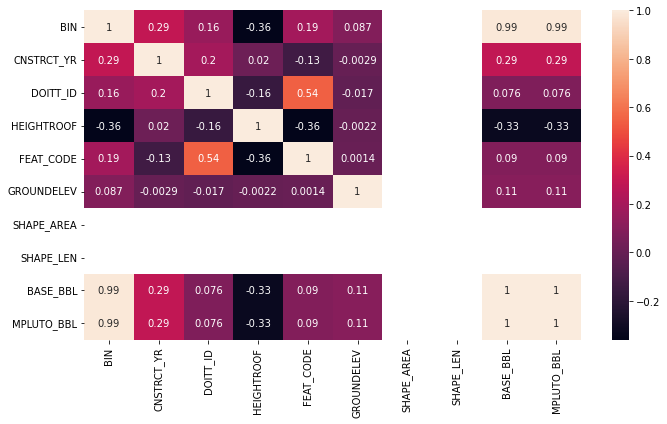

In [26]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    building_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

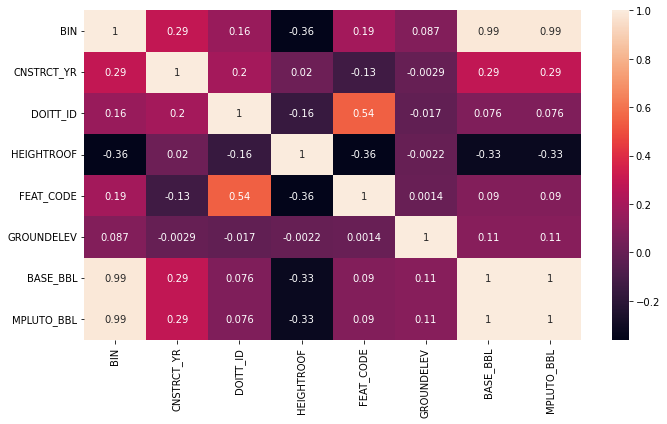

In [27]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

# dropping columns of all nulls
corr_df = building_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [28]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,096,810


In [29]:
# total non-nulls in dataframe
nonnull_count = (
    building_df
    .notnull()
    .sum()
    .sum()
)

print('total non-nulls in dataframe: {:,}'.format(nonnull_count))

total non-nulls in dataframe: 16,250,550


In [30]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1082275
CNSTRCT_YR      10756
HEIGHTROOF       2683
GROUNDELEV        541
LSTSTATYPE        283
GEOMSOURCE        262
FEAT_CODE          10
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GLOBALID            0
dtype: int64

In [31]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 / len(building_df) * 100
)

NAME          99.821529
CNSTRCT_YR     0.992059
HEIGHTROOF     0.247461
GROUNDELEV     0.049898
LSTSTATYPE     0.026102
GEOMSOURCE     0.024165
FEAT_CODE      0.000922
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
GLOBALID       0.000000
dtype: float64

In [32]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / len(building_df)) * 100

# creating a dataframe
(pd.DataFrame(
    missing_data, columns=['perc_missing'])
 .sort_values(by='perc_missing', ascending=False)
)

,perc_missing
NAME,99.821529
CNSTRCT_YR,0.992059
HEIGHTROOF,0.247461
GROUNDELEV,0.049898
LSTSTATYPE,0.026102
GEOMSOURCE,0.024165
FEAT_CODE,0.000922
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000


In [33]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084205,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1084206,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1084207,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1084208,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE      True
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [35]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1084205    False
1084206    False
1084207    False
1084208    False
1084209    False
Name: NAME, Length: 1084210, dtype: bool

In [36]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
3591,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100.0,16.0,0,0,1013730001,1013730001,Photogramm,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7}
4324,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110.0,98.0,0,0,2032730001,2032730001,Photogramm,{8A21945E-76A9-47A7-9355-2D500A91A949}
5812,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100.0,70.0,0,0,2031200020,2031200020,Photogramm,{2BCDE23D-4DD7-4642-8FC1-B347EDE772CA}
8016,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100.0,18.0,0,0,2051410120,2051410120,Photogramm,{E7006798-10CF-49AA-BE4E-A1039405D38A}
8172,MULTIPOLYGON (((-73.90110014758918 40.73308422...,NO NAME,4597316,1940.0,08/17/2017 12:00:00 AM,Constructed,786648,11.000000,5110.0,68.0,0,0,4023750180,4023750180,Other (Man,{E2CADF8E-D955-4BD4-AEED-0EFC3A2149C4}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078425,MULTIPOLYGON (((-73.98369699639441 40.75922814...,Hampshire Hotel Suites,1022676,1906.0,08/22/2017 12:00:00 AM,Constructed,762572,112.310000,2100.0,52.0,0,0,1010000007,1010000007,Photogramm,{05908E0E-3A54-4F3C-890F-566775EBB228}
1080653,MULTIPOLYGON (((-73.98910133090735 40.74826883...,Greeley Sq. Building,1015182,1926.0,08/22/2017 12:00:00 AM,Constructed,200650,349.740000,2100.0,42.0,0,0,1008070039,1008070039,Photogramm,{D9971233-BB74-4D2D-9092-A4163867D782}
1082892,MULTIPOLYGON (((-73.90682762555267 40.67541461...,POPE FRANCIS APARTMENTS AT LORETO,3038661,2022.0,04/14/2023 12:00:00 AM,Constructed,1297533,74.000000,2100.0,69.0,0,0,3014360032,3014360032,Other (Man,{8395779E-2598-4568-9915-BA8098C531A4}
1083871,MULTIPOLYGON (((-73.99327484657796 40.75186765...,Penn. Plaza Deli & Resta*,1014384,1967.0,08/22/2017 12:00:00 AM,Constructed,420269,20.559950,2100.0,34.0,0,0,1007830001,1007830001,Photogramm,{A32BC0E4-C565-4DC7-82F8-5241E175B951}


In [37]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084205,MULTIPOLYGON (((-73.92572206981383 40.76451939...,NaN,4007117,2021.0,06/09/2023 12:00:00 AM,Constructed,1299836,80.000000,2100.0,41.0,0,0,4005790068,4005790068,Other (Man,{CA6487E7-E122-4647-AC82-9EDDF5409F19}
1084206,MULTIPOLYGON (((-73.98154259716286 40.67667538...,NaN,3428833,2023.0,06/07/2023 12:00:00 AM,Constructed,1299818,70.000000,2100.0,43.0,0,0,3009550033,3009557507,Other (Man,{5C3E75B3-C4AD-4F7F-B015-25F0DE9FE0D4}
1084207,MULTIPOLYGON (((-73.98850224824203 40.66443358...,NaN,3023975,2023.0,06/09/2023 12:00:00 AM,Constructed,1299835,50.000000,2100.0,103.0,0,0,3010480053,3010480053,Other (Man,{CC6E9303-3CB4-40C9-9A12-802614E0A15D}
1084208,MULTIPOLYGON (((-73.95275945010673 40.74518878...,NaN,4000343,2022.0,06/09/2023 12:00:00 AM,Constructed,1299649,54.000000,2100.0,13.0,0,0,4000460048,4000460048,Other (Man,{00C7E6DA-49AD-4723-AE80-5F63ACA71C12}


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## Attribute Information for CNSTRCT_YR:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No

## 4.1 Previewing Column Values

In [38]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1084205    2021.0
1084206    2023.0
1084207    2023.0
1084208    2022.0
1084209    2022.0
Name: CNSTRCT_YR, Length: 1084210, dtype: float64

In [39]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets with .loc method
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1084205,2021.0
1084206,2023.0
1084207,2023.0
1084208,2022.0


In [40]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
960035,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100.0,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
713741,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100.0,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
433155,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110.0,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
53072,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100.0,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
524219,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100.0,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [41]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1001030,MULTIPOLYGON (((-73.78443331659071 40.69779352...,NaN,4618598,2023.0,05/03/2023 12:00:00 AM,Constructed,1299584,22.0,2100.0,36.0,0,0,4102540034,4102540034,Other (Man,{9384F005-2A72-4431-8E2F-115F36D09265}
1002239,MULTIPOLYGON (((-73.92823775162091 40.83422938...,NaN,2129149,2023.0,04/04/2023 12:00:00 AM,Constructed,1299431,14.0,2100.0,110.0,0,0,2025120023,2025120023,Other (Man,{1AA23C13-8773-4C97-8614-8B45181D2B72}
1082964,MULTIPOLYGON (((-73.88323423857723 40.67978698...,NaN,3428583,2023.0,04/24/2023 12:00:00 AM,Marked for Construction,1299533,33.0,5100.0,41.0,0,0,3039560059,3039560059,Photogramm,{A1F7D3C0-E25A-45EF-BBAD-9C8954A3C829}
1001265,MULTIPOLYGON (((-73.99588324095397 40.75821142...,NaN,1076207,2023.0,05/02/2023 12:00:00 AM,Marked for Construction,1299576,520.0,5100.0,25.0,0,0,1010500061,1010500061,Other (Man,{DBF1CDA9-979B-4266-A7CD-C45555B1E72C}
398281,MULTIPOLYGON (((-73.95082501726455 40.64693436...,NaN,3117838,2023.0,01/27/2023 12:00:00 AM,Constructed,1298934,55.0,2100.0,44.0,0,0,3051300125,3051300125,Other (Man,{0FD38FEA-2BDC-4124-9EA9-C440DA9DF603}


In [42]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
(building_df
 .sort_values('CNSTRCT_YR', ascending=False)
 .loc[:, ['CNSTRCT_YR']]
 .head()
)

,CNSTRCT_YR
1001030,2023.0
1002239,2023.0
1082964,2023.0
1001265,2023.0
398281,2023.0


In [43]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe()

count    1.073454e+06
mean     1.939462e+03
std      2.928708e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.023000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.2 Exploring Distribution of Values

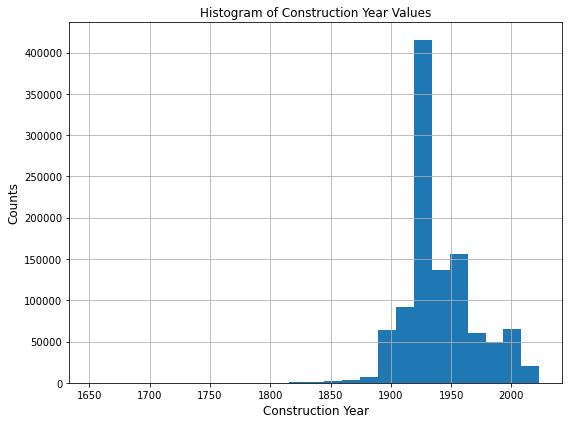

In [44]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 
plt.tight_layout()

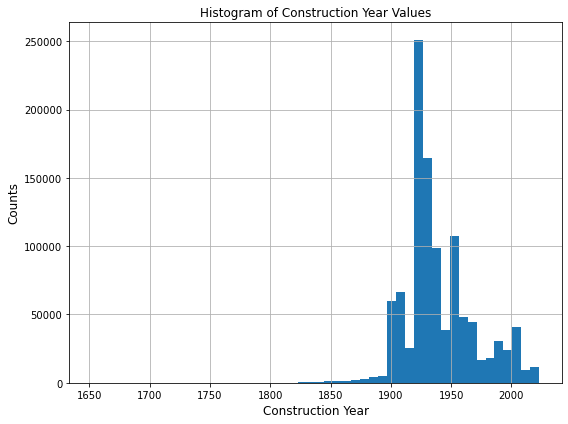

In [45]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)
plt.tight_layout()

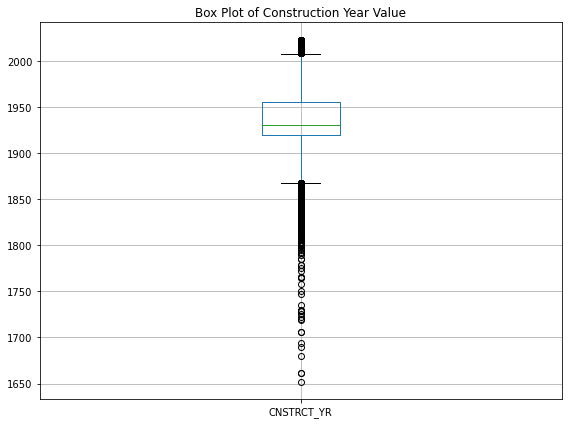

In [46]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(8, 6))

building_df.boxplot(
    column=['CNSTRCT_YR'], 
    ax=ax
)

plt.title('Box Plot of Construction Year Value', fontsize=12)
plt.tight_layout()

## 4.3 Filtering Data

In [47]:
# df.iloc: Purely integer-location based indexing for selection by position.

# first row, first column
building_df.iloc[0, 0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [48]:
# first row, start at second column return all columns
building_df.iloc[0, 1:]

NAME                                             NaN
BIN                                          3170958
CNSTRCT_YR                                    1925.0
LSTMODDATE                    08/22/2017 12:00:00 AM
LSTSTATYPE                               Constructed
DOITT_ID                                       96807
HEIGHTROOF                                 29.749853
FEAT_CODE                                     2100.0
GROUNDELEV                                      40.0
SHAPE_AREA                                         0
SHAPE_LEN                                          0
BASE_BBL                                  3065220021
MPLUTO_BBL                                3065220021
GEOMSOURCE                                Photogramm
GLOBALID      {31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
Name: 0, dtype: object

In [49]:
# first row, start at second column up to the last
building_df.iloc[0, 1:-1]

NAME                             NaN
BIN                          3170958
CNSTRCT_YR                    1925.0
LSTMODDATE    08/22/2017 12:00:00 AM
LSTSTATYPE               Constructed
DOITT_ID                       96807
HEIGHTROOF                 29.749853
FEAT_CODE                     2100.0
GROUNDELEV                      40.0
SHAPE_AREA                         0
SHAPE_LEN                          0
BASE_BBL                  3065220021
MPLUTO_BBL                3065220021
GEOMSOURCE                Photogramm
Name: 0, dtype: object

In [50]:
# specify row and column positions
building_df.iloc[[0, 5, 10], [0, 2, 5, 8]]

,the_geom,BIN,LSTSTATYPE,FEAT_CODE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,3170958,Constructed,2100.0
5,MULTIPOLYGON (((-74.14644228489016 40.58885592...,5122427,Constructed,2100.0
10,MULTIPOLYGON (((-74.1344861688728 40.600563532...,5034441,Constructed,2100.0


In [51]:
# df.loc: Access a group of rows and columns by label(s) or a boolean array.

# locate rows where construction year > 2000
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100.0,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100.0,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100.0,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100.0,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110.0,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [52]:
# locate construction year > 2000, columns 'BIN', 'CNSTRCT_YR'
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000, ['BIN', 'CNSTRCT_YR']]
 .head()
)

,BIN,CNSTRCT_YR
6,5133580,2001.0
50,3394646,2009.0
80,3072927,2003.0
98,3390096,2004.0
224,4555084,2004.0


In [53]:
# locate construction year greater than 2000 but less than 2020
(building_df
 .loc[(building_df['CNSTRCT_YR'] > 2000)
      & (building_df['CNSTRCT_YR'] < 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100.0,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100.0,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100.0,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100.0,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110.0,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [54]:
# locate construction year between 2000 and 2020 inclusive
(building_df
 .loc[building_df['CNSTRCT_YR'].between(2000, 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100.0,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.040000,2100.0,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100.0,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100.0,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100.0,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}


In [55]:
# locate construction year value is in list
years = [2000, 2020]

(building_df
 .loc[building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.04,2100.0,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
195,MULTIPOLYGON (((-74.13556237981483 40.64013483...,NaN,5132682,2000.0,08/22/2017 12:00:00 AM,Constructed,926272,29.08,2100.0,28.0,0,0,5010750122,5010750122,Photogramm,{6E88B8D1-E1FC-4421-BC53-42D3C4BCFE52}
452,MULTIPOLYGON (((-73.87150759130621 40.75533109...,NaN,4538129,2000.0,12/07/2018 12:00:00 AM,Constructed,1108486,38.00,2100.0,78.0,0,0,4017110040,4017110040,Other (Man,{E48501F8-F7F6-4B20-879D-20D8ED1F0DF3}
553,MULTIPOLYGON (((-74.0658246076789 40.592294919...,NaN,5132135,2000.0,12/07/2018 12:00:00 AM,Constructed,922090,31.00,2100.0,10.0,0,0,5031230005,5031230005,Other (Man,{D33FC432-28B1-4B87-A9FE-327923A7B9D1}
1269,MULTIPOLYGON (((-73.79809509137095 40.67312203...,NaN,4536134,2000.0,08/22/2017 12:00:00 AM,Constructed,960214,25.54,2100.0,32.0,0,0,4120600066,4120600066,Photogramm,{81BEA7A2-37AE-4BB3-8565-A43BCF9263C8}


In [56]:
# locate construction year value not in list
years = [2000, 2020]

(building_df
 .loc[~building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


## 4.4 Create New Columns

In [57]:
# create flag for buildings built after 2020, 1 (True) and 0 (False)
new_cols_df = building_df.copy()

new_cols_df.loc[new_cols_df['CNSTRCT_YR'] > 2020, ['after2020_flag']] = 1
new_cols_df['after2020_flag'] = new_cols_df['after2020_flag'].fillna(0)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0.0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0.0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0.0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0.0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0.0


In [58]:
# create new column rounding HEIGHTROOF
new_cols_df['HEIGHTROOF_round'] = new_cols_df['HEIGHTROOF'].round(0)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag,HEIGHTROOF_round
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0.0,30.0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0.0,23.0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0.0,36.0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0.0,38.0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0.0,18.0


## 4.5 Filling In or Dropping Null Values for CNSTRCT_YR

In [59]:
nulls = building_df.isnull().sum().sum()
print('total nulls: {:,}'.format(nulls))

# dropping all records where 'CNSTRCT_YR' as null
nulls = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .isnull()
    .sum()
    .sum()
)

print('total nulls after dropping nulls in CNSTRCT_YR: {:,}'.format(nulls))

total nulls: 1,096,810
total nulls after dropping nulls in CNSTRCT_YR: 1,074,326


In [60]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,756


In [61]:
median = building_df_fillna['CNSTRCT_YR'].median()
print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [62]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)
building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100.0,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100.0,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100.0,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100.0,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100.0,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [63]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Sample Analysis

## 5.1 Line Plot of Year Built

In [64]:
# returning number of buildings by year
year_df = (
    building_df
     .groupby('CNSTRCT_YR')[['DOITT_ID']]
     .count()
     .reset_index()
     .rename({'DOITT_ID': 'count'}, axis=1)
     .set_index('CNSTRCT_YR', drop=True)
)

year_df

,count
CNSTRCT_YR,
1652.0,1
1661.0,2
1680.0,1
1690.0,1
1694.0,1
...,...
2019.0,1160
2020.0,1489
2021.0,1357


In [65]:
# set index to int
year_df.index = year_df.index.astype(int)

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


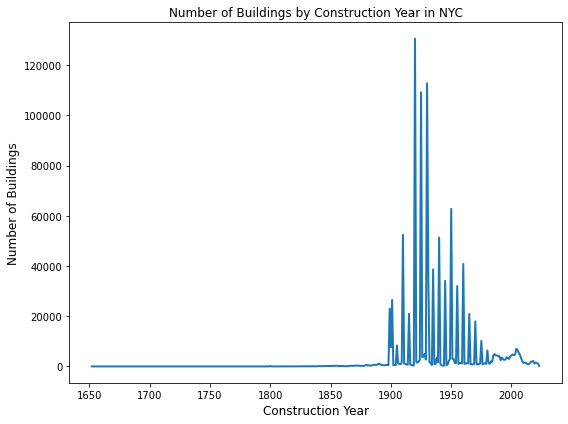

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [67]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


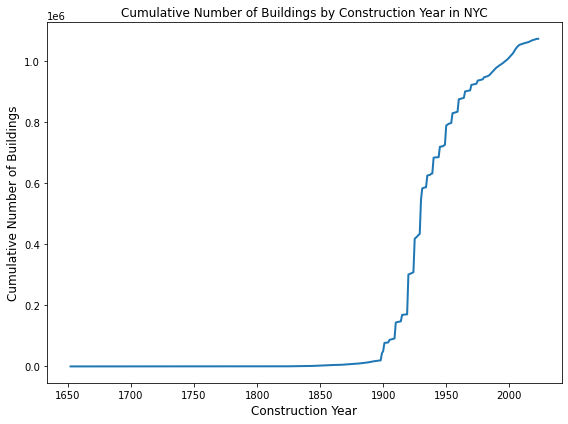

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Identify Oldest Building in Dataset

In [69]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
960035,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
713741,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100.0,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
53072,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100.0,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
524219,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100.0,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
506366,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100.0,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [70]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
960035,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100.0,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset.

Screenshot of Pieter Claesen Wyckoff House from Wikipedia:

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.